# SOK-1006 Arbeidskrav (3)

In [1]:
# Laster inn pakker.
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import Markdown

In [2]:
# Definerer ett intervall mellom 0-1000.
x_1 = np.linspace(0, 1000, 1000)

# Definerer symboler jeg ønsker å bruke i utregningen.
p, t, x = sp.symbols("p t x")

In [3]:
# Lager et preset for å enklere lage figuren senere.
# Hentet fra "forsmak mappe 1".
def create_ax():
                fig, ax = plt.subplots()
                ax.set_ylabel('Pris', loc='top')
                ax.set_xlabel('Kvantum', loc='right')
                ax.set_title("Markedslikevekt")
                ax.set(xlim=(100,400))
                ax.set(ylim=(40,140))
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                
                return fig, ax

In [4]:
# Skriver om (slik at vi p som avhengig variabel) og definerer etterspørselsfunksjonen.
def demand(x):
    return (500-x)/3.2

# Skriver om (slik at vi p som avhengig variabel) og definerer tilbudsfunksjonen.
def supply(x, t):
    return ((100+x)/4.3) + t

#### Oppgave 1

In [5]:
# Setter etterspørselen lik tilbudet med alle verdier for t.
eq_dem_sup = sp.Eq(demand(x), supply(x, t))

# Finner likevektskvantum.
eq_quantum = sp.solve(eq_dem_sup, x)
eq_quantum = sp.simplify(eq_quantum[0])

# Finner likevektspris.
eq_price = sp.simplify(demand(eq_quantum))

In [6]:
# Skriver ut svaret på oppgave 1.
print("Likevektspris for alle verdier av t er " + str(eq_price))
print("Likevektskvantum for alle verdier av t er " + str(eq_quantum))

Likevektspris for alle verdier av t er 0.573333333333333*t + 80.0
Likevektskvantum for alle verdier av t er 244.0 - 1.83466666666667*t


#### Oppgave 2

In [7]:
# Finner konsumentoverskudd.
eq_consumer_surplus = sp.simplify(sp.integrate(demand(x)-eq_price, (x,0,eq_quantum)))

# Finner produsentoverskudd.
eq_producer_surplus = sp.simplify(sp.integrate(eq_price-supply(x, t), (x,0,eq_quantum)))

# Finner avgiftproveny.
eq_tax_revenue = sp.simplify(sp.integrate(t, (x, 0, eq_quantum)))

In [8]:
# Skriver ut svaret på oppgave 2.
print("Konsumentoverskuddet kan utrykkes som: " + str(eq_consumer_surplus))
print("Produsentoverskuddet kan utrykkes som: " + str(eq_producer_surplus))
print("Avgiftprovenyen kan utrykkes som: " + str(eq_tax_revenue))

Konsumentoverskuddet kan utrykkes som: 0.525937777777778*t**2 - 139.893333333333*t + 9302.5
Produsentoverskuddet kan utrykkes som: 0.391395555555555*t**2 - 104.106666666667*t + 6922.79069767442
Avgiftprovenyen kan utrykkes som: t*(244.0 - 1.83466666666667*t)


#### Oppgave 3

In [9]:
# Setter etterspørselen lik tilbudet der t = 0.
eq_dem_sup_t_zero = sp.Eq(demand(x), supply(x, 0))

# Finner likevekstkvantum.
eq_quantum_t_zero = sp.solve(eq_dem_sup_t_zero, x)
eq_quantum_t_zero = float(eq_quantum_t_zero[0])

# Finner likevekstpris.
eq_price_t_zero = float(demand(eq_quantum_t_zero))

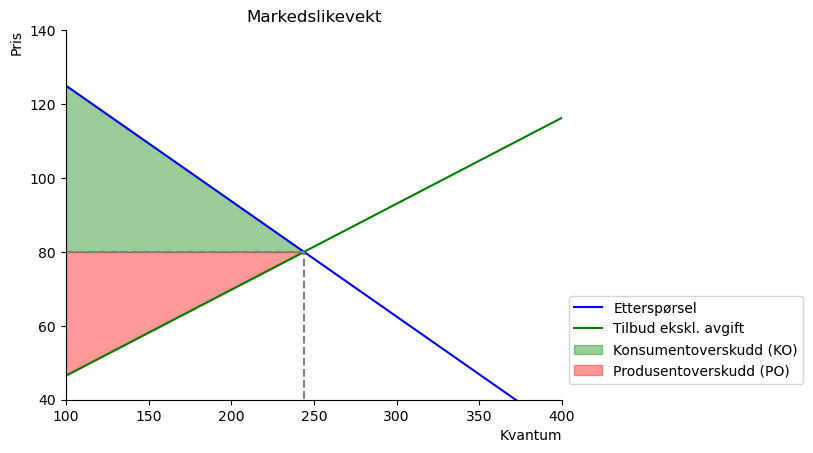

In [10]:
# Henter akse preset.
fig, ax = create_ax()

# Tegner inn tilbud og etterspørsel.
ax.plot(x_1, demand(x_1),    color = "blue",  label = "Etterspørsel")
ax.plot(x_1, supply(x_1, 0), color = "green", label = "Tilbud ekskl. avgift") 

# Tegner inn likevekt.
ax.hlines(eq_price_t_zero, 0,  eq_quantum_t_zero, linestyle = "--", color = "grey")
ax.vlines(eq_quantum_t_zero, 0, eq_price_t_zero,  linestyle = "--", color = "grey")

# Lager ett intervall mellom 0 og likevekts kvantum.
x_2 = np.linspace(0, eq_quantum_t_zero, 1000)

# Fyller inn området til KO og PO.
ax.fill_between(x_2, eq_price_t_zero, demand(x_2),    color = "green", alpha = 0.4, label = "Konsumentoverskudd (KO)")
ax.fill_between(x_2, eq_price_t_zero, supply(x_2, 0), color = "red",   alpha = 0.4, label = "Produsentoverskudd (PO)")

# Legger til legend.
ax.legend(bbox_to_anchor = (1, 0.3))

#### Oppgave 4

In [11]:
# Setter etterspørselen lik tilbudet der t = 4.
eq_dem_sup_t_four = sp.Eq(demand(x), supply(x, 4))

# Finner likevekstkvantum.
eq_quantum_t_four = sp.solve(eq_dem_sup_t_four, x)
eq_quantum_t_four = float(eq_quantum_t_four[0])

# Finner likevekstpris.
eq_price_t_four = float(demand(eq_quantum_t_four))

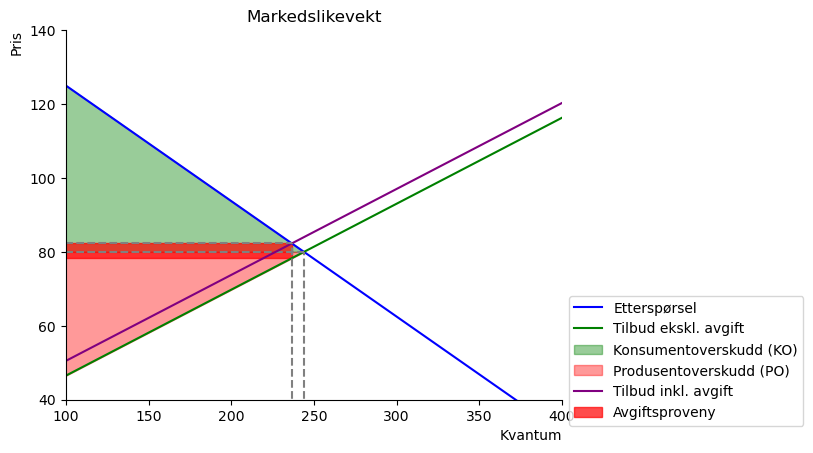

In [12]:
# Tegner inn t = 4.
ax.plot(x_1, supply(x_1, 4), color = "purple", label = "Tilbud inkl. avgift") 

# Tegner inn ny likevelt.
ax.hlines(eq_price_t_four, 0, eq_quantum_t_four,  linestyle = "--", color = "grey")
ax.vlines(eq_quantum_t_four, 0 , eq_price_t_four, linestyle = "--", color = "grey")

# Lager ett intervall mellom 0 og likevekts kvantum.
x_3 = np.linspace(0, eq_quantum_t_four)

# Fyller inn området for avgiftproveny.
ax.fill_between(x_3, eq_price_t_four, eq_price_t_four - 4, color = "red", alpha = 0.7, label = "Avgiftsproveny")

# Oppdaterer legend.
ax.legend(bbox_to_anchor = (1, 0.3))

# Viser figuren
fig

#### Oppgave 5

In [13]:
# Finner ut av manglende verdier.
# Produsent- og konsumentoverskudd for t = 0.
producer_surpluss_t0 = sp.integrate(eq_price_t_zero-supply(x, 0), (x, 0, eq_quantum_t_zero))
consumer_surpluss_t0 = sp.integrate(demand(x)-eq_price_t_zero, (x, 0, eq_quantum_t_zero))

# Produsent- og konsumentoverskudd for t = 4.
producer_surpluss_t4 = sp.integrate(eq_price_t_four-supply(x, 4), (x, 0, eq_quantum_t_four))
consumer_surpluss_t4 = sp.integrate(demand(x)-eq_price_t_four, (x, 0, eq_quantum_t_four))

# Skatteproveny, t = 4.
tax_revenue = sp.integrate(4, (x, 0, eq_quantum_t_four))

# Dødvektstap, t = 4.
loss = sp.integrate(demand(x) - supply(x, 0), (x, eq_quantum_t_four, eq_quantum_t_zero))

# Forenkling av utrykk.
KO_PO_before = consumer_surpluss_t0 + producer_surpluss_t0
KO_PO_after  = consumer_surpluss_t4 + producer_surpluss_t4

In [14]:
tbl=f"""
|                     | Før avgift                        |Etter avgift                       | Endring (etter avgift-før avgift)                      |
|:--------------------|:----------------------------------|:----------------------------------|:-------------------------------------------------------|
|Konsumentpris        |${round(eq_price_t_zero, 2)}$      |${round(eq_price_t_four,2)}$       |${round(eq_price_t_four-eq_price_t_zero, 2)}$           |
|Produsentpris        |${round(eq_price_t_zero, 2)}$      |${round(eq_price_t_four-4,2)}$     |${round(eq_price_t_four-4-eq_price_t_zero, 2)}$         |
|Kvantum              |${round(eq_quantum_t_zero, 2)}$    |${round(eq_quantum_t_four,2)}$     |${round(eq_quantum_t_four-eq_quantum_t_zero, 2)}$       |  
|Konsumentoverskudd:  |${round(consumer_surpluss_t0, 2)}$ |${round(consumer_surpluss_t4, 2)}$ |${round(consumer_surpluss_t4-consumer_surpluss_t0, 2)}$ |
|Produsentoverskudd:  |${round(producer_surpluss_t0, 2)}$ |${round(producer_surpluss_t4, 2)}$ |${round(producer_surpluss_t4-producer_surpluss_t0, 2)}$ |
|KO + PO:             |${round(KO_PO_before, 2)}$         |${round(KO_PO_after, 2)}$          |${round(KO_PO_after-KO_PO_before, 2)}$                  |
|Skatteproveny        |0                                  |${round(tax_revenue, 2)}$          |${round(tax_revenue-0, 2)}$                             |
|Dødvektstap          |0                                  |${round(loss, 2)}$                 |${round(loss-0, 2)}$                                    |
"""
display(Markdown(tbl))


|                     | Før avgift                        |Etter avgift                       | Endring (etter avgift-før avgift)                      |
|:--------------------|:----------------------------------|:----------------------------------|:-------------------------------------------------------|
|Konsumentpris        |$80.0$      |$82.29$       |$2.29$           |
|Produsentpris        |$80.0$      |$78.29$     |$-1.71$         |
|Kvantum              |$244.0$    |$236.66$     |$-7.34$       |  
|Konsumentoverskudd:  |$9302.50$ |$8751.34$ |$-551.16$ |
|Produsentoverskudd:  |$6922.79$ |$6512.63$ |$-410.16$ |
|KO + PO:             |$16225.29$         |$15263.97$          |$-961.32$                  |
|Skatteproveny        |0                                  |$946.65$          |$946.65$                             |
|Dødvektstap          |0                                  |$14.68$                 |$14.68$                                    |
